## 8.1 Curse of Dimensionality

- 테두리의 두께가 0.001인 단위 면적 안에 있는 점을 무작위로 선택할 때, 테두리 밖의 점을 선택할 가능성은 1 - (1-2*0.001)<sup>2</sup> = 0.4%.

- 하지만, 10,000차원에서 같은 작업을 반복할 때 테두리 밖의 점을 선택할 가능성은 1 - (1-2*0.001)<sup>10000</sup> >= 99.999999%

- 이는 임의의 두 점을 선택하여 두 점 사이의 평균 거리를 계산했을 때는 더 극대화됨.
(단위 면적에서는 임의의 두 점 사이의 평균 거리가 0.52 정도이지만, 1,000,000차원에서 임의의 두 점 사이의 평균 거리는 408.25가 됨)

=> 두 점이 단위 초입방체에 같이 놓여 있음에도 불구하고, 굉장히 멀리 떨어질 수 있다는 것은 고차원 데이터셋으로 해석하면 데이터가 매우 희박할 위험이 크다는 것. 즉, 새로운 샘플이 학습에 사용된 샘플과 멀리 떨어져 있을 가능성이 높다는 것을 의미한다.

- 차원의 저주를 해결하기 위한 해결책 하나는 학습 데이터의 밀도가 충분히 높아질 수 있도록 데이터셋을 증가시키는 것인데, 이 때 데이터의 밀도가 충분히 높아질 때까지 데이터의 Feature의 수(차원 수)가 증가함에 따라 필요한 데이터셋은 기하급수적으로 늘어난다.

=> 예를 들어, Feature 수가 100개만 되더라도, 데이터가 모든 차원에 균일하게 퍼져 있기 위해 학습 데이터들의 거리를 서로 0.1 이내에 위치시키려면 관측 가능한 우주에 있는 원자 수 모두를 합친 것보다 더 많은 데이터가 필요하다.

=> 따라서 차원 축소는 필요하며, 이 때 사용되는 두 가지 주요 접근 방법이 Projection(투영), Manifold Training(매니폴드 학습)이고, 가장 인기 있는 차원 축소 기법은 PCA, 커널 PCA, LLE 등이 있다.

## 8.2 Approaches to Reducing Dimensions

- 1) Projection : 대부분의 실전 문제에서 사용되는 데이터들은 모든 차원에 걸쳐서 균일하게 퍼져있기보다는, 대부분의 특성에서는 변화가 없는 반면 어떤 특성들에서는 서로 강하게 연관되어 있다. 결과적으로 학습 데이터들은 고차원 공간 안의 저차원 부분 공간에 놓여 있다고 볼 수 있다.

- 2) Manifold Training : d차원 Manifold는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부이다.

#### Projection

In [174]:
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

if os.name == 'posix':
    plt.rc('font', family = 'AppleGothic')

root_dir = './'

def image_path(fig_id):
    return os.path.join(root_dir, fig_id)
    
def save_fig(fig_id, tight_layout = True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + '.png', format = 'png', dpi = 300)

In [168]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0),(0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [169]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s,x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2] * x1 + R[1,2] * x2) / (1 - R[2,2])

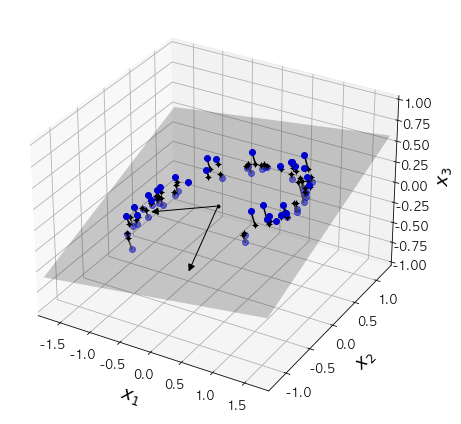

In [176]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))
# ax = plt.axes(projection="3d")
ax = fig.add_subplot(111,projection="3d")

X3D_above = X[X[:,2] > X3D_inv[:,2]]
X3D_below = X[X[:,2] < X3D_inv[:,2]]

ax.plot(X3D_below[:,0], X3D_below[:,1],X3D_below[:,2],"bo",alpha=0.5)
#plot에 있는 alpha 값은 투명도를 설정

ax.plot_surface(x1, x2, z, alpha = 0.2, color = "k")
np.linalg.norm(C, axis = 0)
ax.add_artist(Arrow3D([0, C[0,0]], [0, C[0,1]], [0, C[0,2]],mutation_scale=15, lw = 1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1,0]], [0, C[1,1]], [0, C[1,2]],mutation_scale=15, lw = 1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i,2] > X3D_inv[i,2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
        
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], "k+")
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], "k.")
ax.plot(X3D_above[:,0], X3D_above[:,1], X3D_above[:,2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# save_fig("dataset_3d_plot")
plt.show()

# ax.scatter3D(X_centered[:,0], X_centered[:,1], X_centered[:,2],label="x1")
# ax.set_xlabel('x1',fontweight='bold',fontsize=17)
# ax.set_ylabel('x2',fontweight='bold',fontsize=17)
# ax.set_zlabel('x3',fontweight='bold',fontsize=17)
# plt.show()



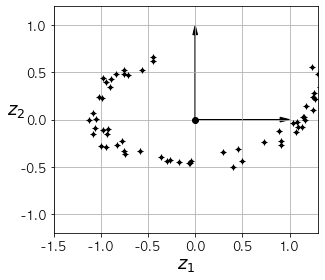

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:,0], X2D[:,1], "k+")
ax.plot(X2D[:,0], X2D[:,1], "k.")
ax.plot([0],[0],"ko")
ax.arrow(0,0,0,1, head_width=0.05, length_includes_head = True, head_length=0.1, fc='k', ec='k')
ax.arrow(0,0,1,0, head_width=0.05, length_includes_head = True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

#### Manifold Learning

- Swiss roll

In [186]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

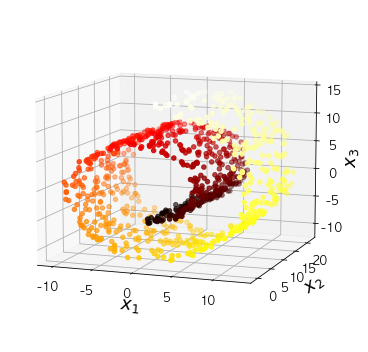

In [196]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1],X[:,2], c=t, cmap = plt.cm.hot) #c : color, cmap : colormap
ax.view_init(10,-70)
ax.set_xlabel("$x_1$",fontsize=18) #$ 표시는 아래첨자 등의 표현이 가능하게 만들어줌
ax.set_ylabel("$x_2$",fontsize=18)
ax.set_zlabel("$x_3$",fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()


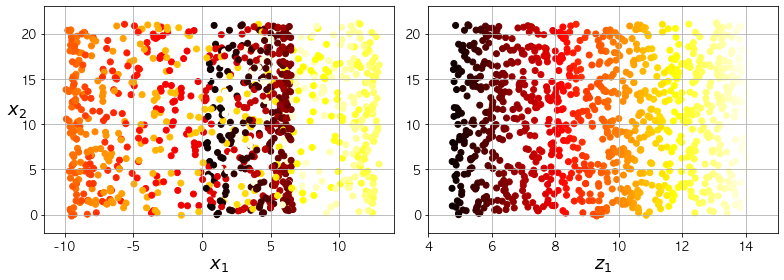

In [203]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$x_2$",fontsize=18,rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:,1], c=t, cmap=plt.cm.hot)
plt.axis([4,15,axes[2], axes[3]])
plt.xlabel("$z_1$",fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

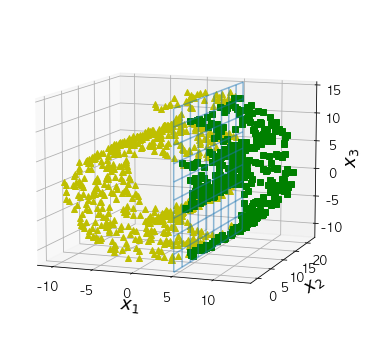

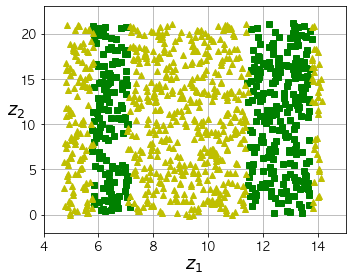

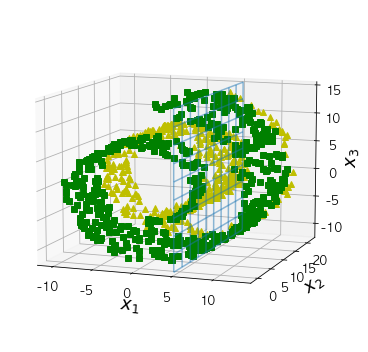

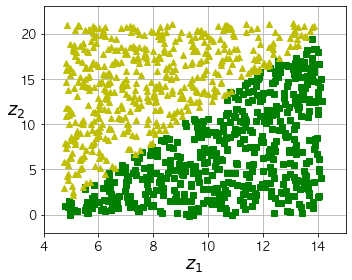

In [220]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:,0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10,-70)
ax.plot(X_neg[:,0], X_neg[:,1], X_neg[:,2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize = (5,4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4,15,axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = 2*(t[:]-4) > X[:,1]
X_pos = X[positive_class]
X_neg = X[~positive_class]

ax.view_init(10,-70)
ax.plot(X_neg[:,0], X_neg[:,1], X_neg[:,2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize = (5,4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4,15,axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()

## 8.3 PCA

#### 8.3.1 분산 보존

- 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적이다.

- 즉, 분산이 최대가 되는 축이 원본 데이터셋과 Projection된 것 사이의 평균 제곱 거리를 최소화하는 축이 된다.

#### 8.3.2 주성분

- 분산이 최대가 되는 첫 번째 축을 찾았으면, 첫 번째 축에 직교하면서 남은 분산을 최대로 보존하는 두 번째 축을 찾는다.

- 이 때 i번째 축을 이 데이터의 i번째 주성분(Principal Component, PC)라 하며, 주성분을 찾는 방법은 SVD(Singular Value Decomposition)을 이용한다.

**공분산 행렬의 고유 벡터는 분산이 어느 방향으로 가장 큰지**를 나타내므로, Input Feature Vector를 SVD 분해했을 때 **V가 공분산 행렬의 고유 벡터가 되고, 이 벡터가 PC**가 된다.

다만, **np.linalg.svd()를 통해 얻은 V는 V.T이므로**, Principal Component를 얻기 위해서는 **V를 다시 Transpose**해야 한다.

#### SVD 분해를 이용한 PCA

In [122]:
import numpy as np

np.random.seed(42)

m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

np.random.rand(60)
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
X[:, 2] = X[:,0]*w1 + X[:,1] * w2 + noise * np.random.randn(m)

In [123]:
X_centered = X - X.mean(axis = 0) #PCA는 데이터셋의 평균이 0이라고 가정하므로, 이를 맞추기 위해 X_centered를 새로운 변수로 설정
#.mean은 axis=0의 경우 각 열에 대한 평균값, axis=1은 각 행에 대한 평균값을 의미
U, s, Vt = np.linalg.svd(X_centered)
# U, s, Vt = np.linalg.svd(X_centered, full_matrices = False) #full_matrices = False로 할 경우 X_centered = U*s*Vt로 나타낼 수 있음
#linalg 는 Linear Algebra
#s는 대각행렬로 np.diag(s)로 사용. s는 항상 내림차순 되어있음
U.shape, s.shape, Vt.shape

((60, 60), (3,), (3, 3))

In [143]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))
#numpy.dot()는 행렬을 곱할 때 사용. 같은 위치의 element끼리 곱하는게 아님
#numpy.allclose()는 두 행렬의 element-wise equal일 때 

array([7.07991563, 2.59780092, 0.81432933])

In [126]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_SVD = X2D
#3D Dataset을 PC로 이루어진 2D 평면에 Projection하는 방법 : X_d-proj = X*W_d (W_d는 V의 첫 d열로 구성된 행렬)
#X_centered는 (60,3), W2는 (3,2). 
#X_centered.T로 해석하면 3차원 벡터 60개가 있는 것이고, 이 3차원 벡터를 PC1, PC2를 각 축으로 가지는 2차원 평면에 Projection해야 함
#방법은 그 벡터를 PC1에 내적한 점을 x 좌표로, PC2에 내적한 점을 y 좌표로 가져야 하므로 결국 X_centered * W2는 벡터들의 내적이 됨.
#결과로 파생되는 X_centered의 shape은 (60,2)이며, X_centered.T는 PC1, PC2에 결국 2차원 벡터 60개가 됨.

In [127]:
X3D_inv_SVD = X2D_SVD.dot(Vt[:2,:])

np.allclose(X3D_inv_SVD, X3D_inv-pca.mean_)

False

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X) 
#sklearn에서 제공하는 PCA는 데이터셋을 자동으로 중앙에 맞춰주기에 X_centered = X - X.mean(axis=0)을 할 필요가 없음
#pca.fit_transform()을 하고 나면, pca.components_에 W_d의 전치가 담겨 있음.
#ex) PC1 = pca.components_.T[:,0]임

X3D_inv = pca.inverse_transform(X2D) #PCA Inverse를 하면 X와 같아져야겠지만, 3D -> 2D 과정에서 발생한 loss of information으로 인해 기존 행렬 X와 다름.

np.mean(np.sum(np.square(X3D_inv-X), axis=1))

0.011052204252274411

In [129]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X3D_inv)

0.00368406808409147

In [130]:
np.allclose(X2D_SVD[:,0], X2D[:,0])

True

In [131]:
np.allclose(X2D_SVD[:,1], -X2D[:,1])

True

In [132]:
pca.components_

array([[-0.9605052 , -0.22496059, -0.16377573],
       [ 0.26223923, -0.92864406, -0.26239436]])

In [133]:
Vt[:2,:]

array([[-0.9605052 , -0.22496059, -0.16377573],
       [-0.26223923,  0.92864406,  0.26239436]])

In [134]:
pca.explained_variance_ratio_

array([0.87118352, 0.11729114])

In [151]:
(np.square(s) / np.square(s).sum())[:2] #explained_variance_ratio 계산 방법

array([0.87118352, 0.11729114])

In [135]:
X2D[:5]

array([[-0.75808009, -0.32847371],
       [-1.06471766, -0.09194301],
       [ 1.2470715 ,  0.09922631],
       [-0.82522548, -0.26958993],
       [-1.08393574, -0.1555972 ]])

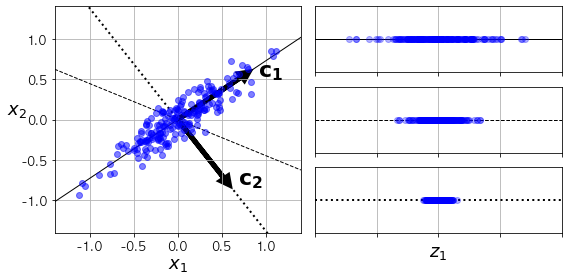

In [223]:
angle = np.pi/5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m,2) / 10
X = X.dot(np.array([[stretch, 0],[0,1]])) #stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) #rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2*np.pi/6), np.sin(angle - 2*np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1,1))
X_proj2 = X.dot(u2.reshape(-1,1))
X_proj3 = X.dot(u3.reshape(-1,1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2),(0,0),rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:,0], X[:,1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0,0,u1[0],u1[1], head_width=0.1, linewidth=5, length_includes_head = True, head_length=0.1, fc='k', ec='k')
plt.arrow(0,0,u3[0],u3[1], head_width=0.1, linewidth=5, length_includes_head = True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0]+0.1, u1[1]-0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0]+0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0,1))
plt.plot([-2,2], [0,0], "k-", linewidth=1)
plt.plot(X_proj1[:,0],np.zeros(m),"bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1,1))
plt.plot([-2,2], [0,0], "k--", linewidth=1)
plt.plot(X_proj2[:,0],np.zeros(m),"bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2,1))
plt.plot([-2,2], [0,0], "k:", linewidth=2)
plt.plot(X_proj3[:,0],np.zeros(m),"bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.xlabel("$z_1$", fontsize=18)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

#### 8.3.6 적절한 차원 수 선택하기

- 축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 더 좋다. 하지만, 데이터 시각화를 위해서는 일반적으로 2~3차원으로 만든다.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

pca = PCA()
pca.fit(X_train)

PCA()

In [ ]:
X_train

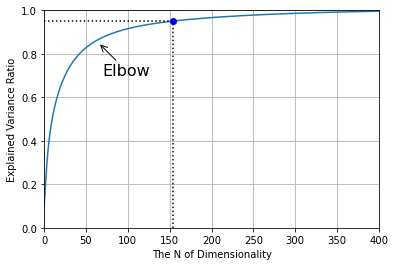

In [4]:
#Variance Ratio를 0.95로 특정하고 차원 수를 지정하는 것보다, 
#PCA fitting시 n_components의 값을 0.0에서 1.0 사이로 조정하면 분산 비율에 따른 n_components로 PCA가 진행됨.
import matplotlib
import matplotlib.pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(range(400),cumsum[:400])
plt.axis([0,400,0.0,1.0])
plt.plot(d,cumsum[d],'bo')
plt.plot([d,d],[0,cumsum[d]],'k:')
plt.plot([0,d],[cumsum[d],cumsum[d]],'k:')
plt.annotate("Elbow", xy=(65,0.85), xytext=(70,0.7),
            arrowprops=dict(arrowstyle="->"),fontsize=16)
plt.xlabel("The N of Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

In [5]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(52500, 154)

In [6]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(52500, 784)

#### 8.3.7 Reconstruction Error(재구성 오차)

- PCA를 진행해서 얻은 저차원의 데이터를 다시 역변환하여 기존 데이터와 동일한 차원의 데이터를 구하면 기존 데이터와 차원은 같지만, 차원 축소 과정에서 손실된 분산으로 인해 기존 데이터와 약간의 차이를 보인다.

- 이 때 원본 데이터와 재구성된 데이터(데이터 압축 후 역변환한 데이터) 사이의 평균 제곱 거리를 **재구성 오차(Reconstruction error)**라 한다.

In [11]:
import matplotlib as mpl
import os



def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

root_dir = './'

def image_path(fig_id):
    return os.path.join(root_dir, fig_id)
    
def save_fig(fig_id, tight_layout = True):
    if tight_layout:
        plt.tight_layout() #tight_layout()은 여백(padding)에 관련된 subplot parameter를 조정한다.
    plt.savefig(image_path(fig_id) + '.png', format = 'png', dpi = 300)

In [8]:
X_train.shape

(52500, 784)

In [9]:
np.array(X_train).shape

(52500, 784)

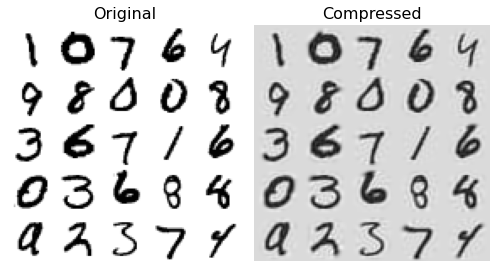

In [12]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(np.array(X_train)[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")
plt.show()

In [13]:
X_reduced_pca = X_reduced

#### 8.3.8 Randomized PCA(랜덤 PCA)

- PCA module에서 svd_solver 매개변수를 "randomized"로 설정하면 사이킷런은 Randomized PCA라 부르는 확률적 알고리즘을 사용해 처음 d개(n_components 매개변수를 이용해서 설정)의 주성분에 대한 근삿값을 빠르게 찾는다. 주성분 갯수 d가 전체 샘플 특성 수 n개보다 작을수록 훨씬 빨라진다.

- svd_solver의 기본값은 "auto"이지만, m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 Randomized PCA를 사용한다.

- 만약 기존 SVD 방식을 강제하려면 svd_solver 매개변수를 "full"로 설정하면 됨.

In [22]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

#### 8.3.9 Incremental PCA

- PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 학습 데이터셋을 메모리에 올려야 한다는 것.

- 이 때 IPCA(Incremental PCA) 알고리즘을 사용할 수 있음. 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나씩 주입하는 방법.

    => 데이터셋이 클 때 유용하며, 온라인으로(즉, 새로운 데이터가 준비되는대로 실시간으로) PCA를 적용할 수 있는 방법.
    
    - 전체 데이터셋으로 fitting할 때는 .fit()을 사용하지만, IPCA는 미니배치이므로 .partial_fit()을 사용한다.

In [23]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

#### np.memmap()

- IPCA에서 미니배치를 만드는 다른 방법은 Numpy의 memap 파이썬 클래스를 이용하는 것.

- 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어 있는 것처럼 다루는 것으로, 이 파이썬 클래스는 필요할 때 데이터를 메모리에 적재한다.

- minibatch를 np.array_split으로 직접 나누는 것과 달리 .fit()을 사용할 수 있음.

In [24]:
# filename = "my_mnist.data"
# m,n = X_train.shape

# X_mm = np.memmap(filename, dtype=":float32", mode="readonly", shape=(m,n))

# batch_size = m // n_batches

# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

## 8.4 Kernel PCA

- 샘플을 매우 높은 고차원 feature space로 암묵적으로 mapping하여 SVM의 비선형 분류와 회귀를 가능하게 하는 수학적 기법인 커널 트릭이 있음.

- 고차원 특성 공간에서의 선형 결정 경계(Linear Decision Boundary)는 원본 공간에서는 복잡한 비선형 결정 경계에 해당함.

- 같은 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투형을 수행할 수 있으며, 이를 Kernel PCA라 함.

    => 이 기법은 투영된 후 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.

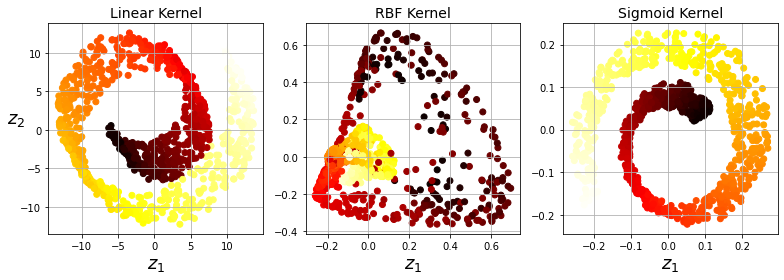

In [73]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel = "linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.0433, fit_inverse_transform = True)
sig_pca = KernelPCA(n_components = 2, kernel = "sigmoid", gamma = 0.001, coef0=1, fit_inverse_transform = True)
#fit_inverse_transform = True는 Projection된 데이터를 학습 데이터로, 원본 데이터를 타겟으로 하는 지도 학습 회귀 모델을 자동으로 학습하도록 하는 파라미터.
#축소된 공간에 있는 데이터를 inverse_transform을 진행한 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓인다.
#이 특성 공간은 무한 차원이므로, 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다. 
#따라서, 위 지도 학습으로 원본 공간의 포인트에 가까운 재구성 이미지를 얻을 수 있는데 이 이미지를 재구성 원상(Pre-image)라 한다.
#이후에 Pre-image를 구하면, Reconstruction Error를 구할 수 있음.
X_reduced = rbf_pca.fit_transform(X)

y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca, "Linear Kernel"), (132, rbf_pca, "RBF Kernel"), (133, sig_pca, "Sigmoid Kernel")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
        
    plt.subplot(subplot)
    plt.title(title,fontsize=14)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$",fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$",fontsize=18, rotation=0)
    plt.grid(True)
    
save_fig("kernel_pca_plot")
plt.show()

#### 8.4.1 커널 선택과 하이퍼파라미터 튜닝

- kPCA는 비지도 학습이므로 커널과 파라미터 선정에 대한 명확한 성능 측정 기준이 없음. 하지만, 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있음.

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03,0.05, 10),
    "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf,param_grid, cv=3)
grid_search.fit(X,y)

grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

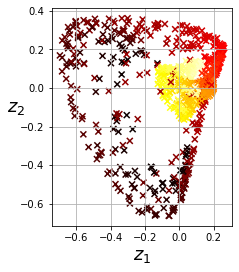

In [75]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11,4))
plt.subplot(132)
plt.scatter(-X_reduced[:,0],-X_reduced[:,1], c=t, cmap=plt.cm.hot, marker='x')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

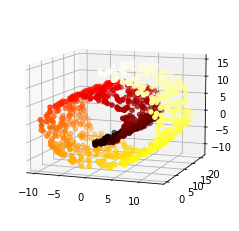

In [76]:
ax = plt.subplot(111, projection='3d')

ax.view_init(10,-70) #보는 각도 설정하는 것
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.hot, marker='o')

True

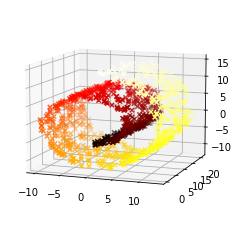

In [79]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

ax = plt.subplot(111, projection='3d')

ax.view_init(10,-70)
ax.scatter(X_preimage[:,0], X_preimage[:,1], X_preimage[:,2], c=t, cmap=plt.cm.hot, marker='x')

np.allclose(X, X_preimage)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

1.0503101704022278e-26

## 8.5 LLE(Locally Linear Embedding)

- 강력한 비선형 차원 축소(NLDR, Non-Linear Dimensionality Reduction) 기술로, 투영에 의존하지 않는 매니폴드 학습.

- 각 훈련 샘플이 Closest Neighbor에 얼마나 선형적으로 연관되어 있는지 측정하고, 국부적인 관계가 가장 잘 보존되는 학습 데이터들의 저차원 표현을 찾는다.
    
    => 다시 말하면 첫번째 단계는 각 데이터 샘플과 k개의 Closet Neighbor간의 제곱 거리가 최소가 되는 weight 값들을 찾는 과정으로, 결국 샘플과 이웃에 대한 선형 함수를 구성하는 것.
    
    => 두번째 단계는 weight를 찾는 대신, weight를 고정한 상태에서 첫번째 단계의 선형 관계를 잘 보존되도록 저차원으로 매핑하는 것. 즉, weight는 고정인 대신 저차원 공간 위의 최적 위치를 찾는 과정. 

- 특히, 잡음이 많지 않은, 꼬인 매니폴드를 펼치는 데 잘 작동함.

In [93]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, random_state=42)
#n_neighbors는 각 샘플당 가장 가까운 Neighbors의 수를 찾는 것
X_reduced = lle.fit_transform(X)

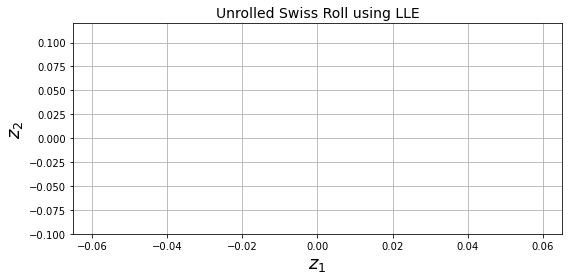

In [105]:
plt.figure(figsize=(8,4))
plt.title("Unrolled Swiss Roll using LLE", fontsize=14)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap = plt.cm.hot)
plt.xlabel("$z_1$",fontsize=18)
plt.ylabel("$z_2$",fontsize=18)
plt.axis([-0.065,0.065,-0.1,0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

## 8.6 다른 차원 축소 기법

- 1) Random Projection(랜덤 투영)

    => 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영하는 방법으로, 랜덤 투영이 실제로 거리를 잘 보존하는 것으로 밝혀짐.
    
    => 차원 축소 품질은 **샘플 수**, **목표 차원수**에 따라 다르며, **초기 차원수**에는 의존적이지 않음.
    
- 2) MDS(Multi - Dimensional Scaling, 다차원 스케일링)

    => 샘플 간의 거리를 보존하면서 차원을 축소
    
- 3) Isomap

    => 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만들고, 샘플 간의 Geodesic Distance(지오데식 거리)를 유지하면서 차원을 축소한다.
    
- 4) t-SNE(t-distributed Stochastic Neighbor Embedding)

    => 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소하는 방법. 주로 시각화에 많이 사용되며 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용된다.
    
- 5) LDA(Linear Discriminant Analysis, 선형 판별 분석)

    => 차원 축소가 아닌, 분류 알고리즘으로 학습 과정에서 클래스를 가장 잘 구분하는 축을 학습하게 됨. 이 축을 이용해서 데이터가 투영되는 초평면을 정의할 수 있음.
    
    => 이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로, SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시켜서 사용함. 

In [98]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [99]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components = 2)
X_reduced_isomap = isomap.fit_transform(X)

In [100]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced_tsne = tsne.fit_transform(X)

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

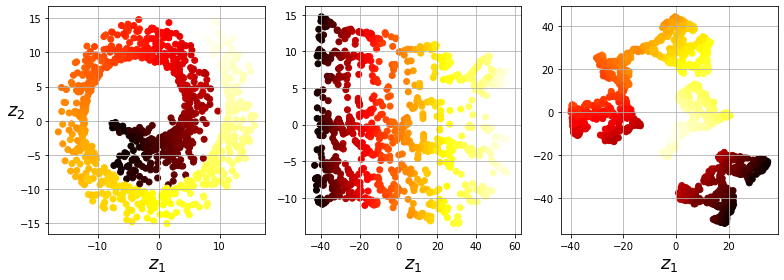

In [107]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131,132,133), titles, 
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap = plt.cm.hot)
    plt.xlabel("$z_1$",fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$",fontsize=18, rotation=0)
    
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()